In [ ]:
!wget -O moviedataset.zip https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
print('unzipping ...')
!unzip -o -j moviedataset.zip

In [ ]:
pip install ipynb --upgrade

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [73]:
ratings_df = pd.read_csv('C:\\Users\\Checkout\\Documents\\SJSU Spring 2022\\CMPE 255\\Project\\ml-latest-small\\ratings.csv')
movies_df = pd.read_csv('C:\\Users\\Checkout\\Documents\\SJSU Spring 2022\\CMPE 255\\Project\\ml-latest-small\\movies.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [74]:
ratings_df.describe()['rating']

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [75]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Checking for NaN Values

In [76]:
#Check Nan values in ratings_df
print("No of Null values in ratings dataframe : ", sum(ratings_df.isnull().any()))

#Check for Nan values in movies_df
print("No of Null values in movies dataframe : ", sum(movies_df.isnull().any()))

No of Null values in ratings dataframe :  0
No of Null values in movies dataframe :  0


### Remove duplicates

In [77]:
#Check duplicates in ratings_df
ratings_dup = ratings_df.duplicated(['movieId','userId','rating'])
dups = sum(ratings_dup)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [78]:
#Check duplicates in movies_df
movies_dup = movies_df.duplicated(['movieId','title','genres'])
dups = sum(movies_dup)
print("There are {} duplicate movie entries in the data..".format(dups))

There are 0 duplicate movie entries in the data..


### Basic Statistics

#### Statistics of ratings dataset

In [79]:
print("Ratings data ")
print("-"*30)
print("\nTotal no of ratings :",ratings_df.shape[0])
print("Total No of users   :", len(np.unique(ratings_df.userId)))
print("Total No of movies  :", len(np.unique(ratings_df.movieId)))

Ratings data 
------------------------------

Total no of ratings : 100836
Total No of users   : 610
Total No of movies  : 9724


### Exploratory Data Analysis

#### EDA on ratings dataset

In [80]:
# method to make y-axis more readable
def human(num, units):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

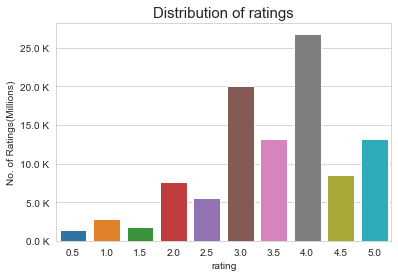

In [81]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=15)
sns.countplot(ratings_df.rating)
ax.set_yticklabels([human(item, 'K') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show()

#### Analysis on the Ratings given by user

In [82]:
no_of_rated_movies_per_user = ratings_df.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: rating, dtype: int64

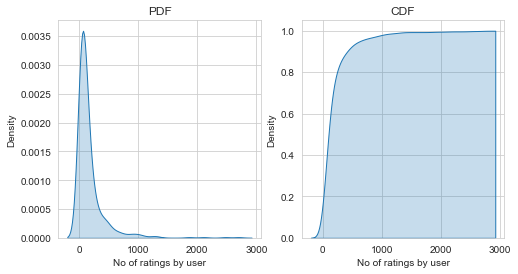

In [83]:
# PDF and CDF of ratings given by a user
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [84]:
no_of_rated_movies_per_user.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

In [85]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

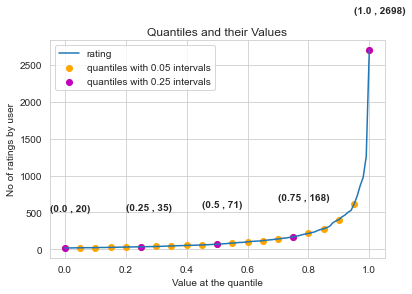

In [86]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate("({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [87]:
quantiles[::5]

0.00      20
0.05      22
0.10      24
0.15      27
0.20      32
0.25      35
0.30      40
0.35      47
0.40      54
0.45      60
0.50      71
0.55      85
0.60     102
0.65     119
0.70     140
0.75     168
0.80     216
0.85     279
0.90     403
0.95     613
1.00    2698
Name: rating, dtype: int64

In [88]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 613)) )


 No of ratings at last 5 percentile : 31



#### Analysis of ratings of a movie given by a user

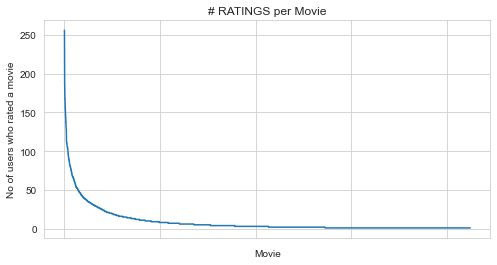

In [89]:
no_of_ratings_per_movie = train_df.groupby(by='movieId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of users who rated a movie')
ax.set_xticklabels([])

plt.show()

#### EDA on Movies Dataset

In [90]:
def str_to_list(x):
    return list(x.split("|"))

In [91]:
#convert genres seperated by string to list 
movies_df['genres'] = movies_df['genres'].apply(str_to_list)
print(movies_df['genres'][0])

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


In [92]:
#find the frequency of each genre
genre_frequency = {}
unique_genre_set = set()

for row in movies_df['genres']:
    for genre in row:
        unique_genre_set.add(genre)
        if genre in genre_frequency:
            genre_frequency[genre]+=1
        else:
            genre_frequency[genre]=1
unique_genre_list = list(unique_genre_set)
display(genre_frequency)

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

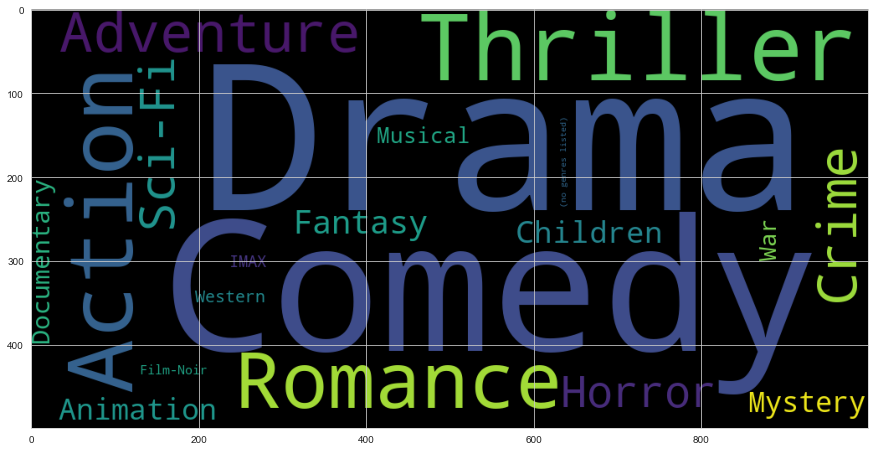

In [93]:
#wordcloud for genres
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(genre_frequency)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)